In [14]:
import pandas as pd # it's about to RAM
import numpy as np
import matplotlib.pyplot as plt

n_turns=150

save res structure in file, as processing log files take time (30 minutes on group members' machin)

In [36]:
import pickle

# with open("res.pickle", "wb") as tf:
#     pickle.dump(res,tf, protocol=pickle.HIGHEST_PROTOCOL)
with open("res.pickle", "rb") as tf:
    res2 = pickle.load(tf)

Util function to summarize result for each particular setting

In [21]:
def process_one_iter(df, n_nodes, size_view):
    print(n_nodes, size_view)
    discovery_df = df[df.Age>=0]

    discovery_rates = {}
    discovered_sets = [set() for i in range(n_nodes+1)]
    views = [[set() for turn in range(n_turns+1)]  for i in range(n_nodes+1)]
    for turn in range(n_turns+1):
        turn_df = df[df['Turn']==turn]
        discovery_rates[turn]=[]    
        for i in range(1,n_nodes+1):
            discovered = discovered_sets[i]
            view = views[i][turn]
            node_df = turn_df[turn_df['Id']==i]
            [(discovered.add(_),view.add(_)) for _ in node_df['Node']]
            discovery_rates[turn].append(len(discovered)/n_nodes)

    killed = int(df[df.Age==-1].Id)
    killed_occ = [[(1 if killed in views[node][turn] else 0) for node in range(n_nodes+1)]  for turn in range(n_turns+1)]
    last_turn = int(df[df.Age==-1].Turn)
    occ_rate = [np.mean(killed_occ[_])/0.15 for _ in range(last_turn, n_turns+1)]
    discovery_rates = [np.mean(discovery_rates[_]) for _ in range(n_turns+1)]
    return discovery_rates, occ_rate

def get_results(n_nodes, size_view):
    global_discovery_rates = [0 for _ in range(n_turns+1)] 
    global_occ_rates = [0 for _ in range(n_turns+1)]
    
    for it in [1,2,3,4,5]:
        print(it)
        tmp_df = pd.read_csv(f'./measures/measures{n_nodes}-{size_view}/{it}.csv') 
        
        discovery_rates, occ_rates = process_one_iter(tmp_df, n_nodes, size_view)
        
        global_discovery_rates = [sum(t) for t in zip(discovery_rates, global_discovery_rates)]
        global_occ_rates = [sum(t) for t in zip(occ_rates, global_occ_rates)]
    
    global_discovery_rates = [rate/5 for rate in global_discovery_rates]
    global_occ_rates = [rate/5 for rate in global_occ_rates]

    return global_discovery_rates, global_occ_rates



In [19]:
# n_nodes = 100
# size_view = 0.1
# it=1
# tmp_df = pd.read_csv(f'./measures/measures{n_nodes}-{size_view}/log{it}.csv')         
# discovery_rates, occ_rates = process_one_iter(tmp_df, n_nodes, size_view)

Aggregate results before plots

In [34]:
res = {}
for n_nodes in [1000]:#,1000]:
    res[n_nodes] = {} 
    for size_view in [0.1, 0.075, 0.05]:
        # 3 elements : 2 arrays (for each turn, give avg discovery rate 
        #                                       and occ rate of exiting node)
        #              the turn during which a node exits
        res[n_nodes][size_view] = get_results(n_nodes, size_view)

1
1000 0.1
2
1000 0.1
3
1000 0.1
4
1000 0.1
5
1000 0.1
1
1000 0.075
2
1000 0.075
3
1000 0.075
4
1000 0.075
5
1000 0.075
1
1000 0.05
2
1000 0.05
3
1000 0.05
4
1000 0.05
5
1000 0.05


Plot it, **discovery rate**

First, while varying the view size

20
25
38


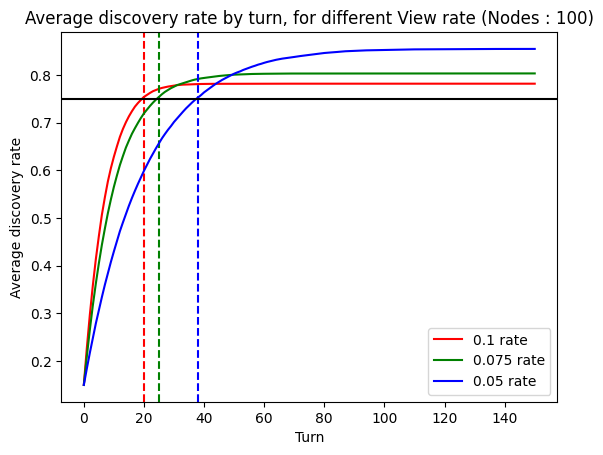

13
17
26


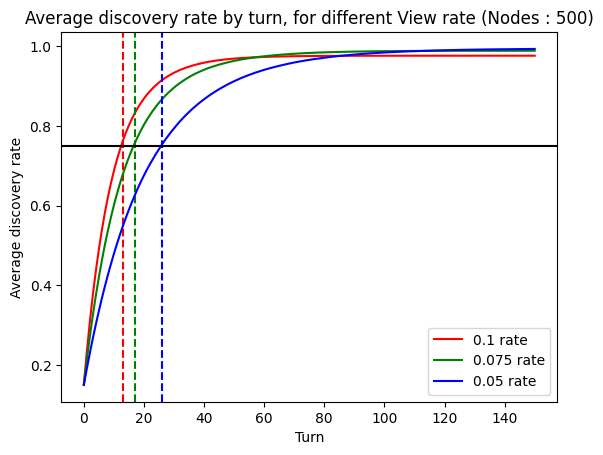

13
17
25


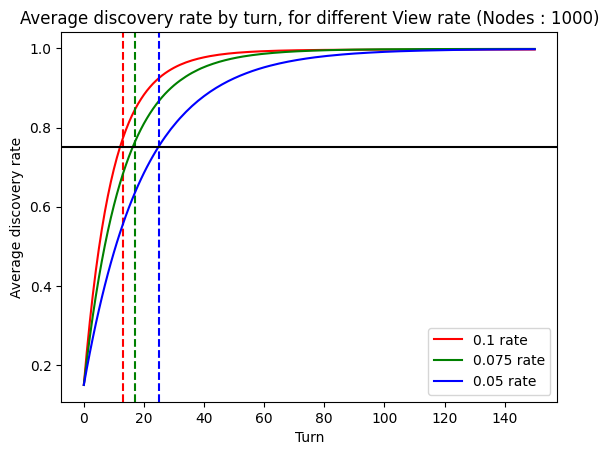

In [37]:
from matplotlib.text import Text

import bisect 
def find_ge(rates, th):
    i = bisect.bisect_left(rates, th)
    return i

for n_nodes in [100, 500,1000]:    
    th = 0.75

    turns = [_ for _ in range(n_turns+1)]
    discovery_rates = [res[n_nodes][size_view][0] for size_view in [0.1,0.075,0.05]]

    
    # print(turn_th)
    turn_ths = []
    repre_ths = []
    colors_xticks = []
    for i, (n_node, color) in enumerate([(0.1,'r'), (0.075,'g'), (0.05, 'b')]):
        turn_th = find_ge(discovery_rates[i], th)
        plt.plot(turns, discovery_rates[i], color, label=str(n_node)+' rate')
        if turn_th<n_turns+1:
            print(turn_th)
            plt.axvline(x=turn_th, color=color, linestyle='--')  
            
    

    plt.axhline(y=th, color='black', linestyle='-')  

    # Adding the title
    plt.title(f"Average discovery rate by turn, for different View rate (Nodes : {n_nodes})")
    plt.legend()
    # Adding the labels
    plt.ylabel("Average discovery rate")
    plt.xlabel("Turn")
    plt.show()

Let's then vary the cluster size

1
0
20
1
13
2
13


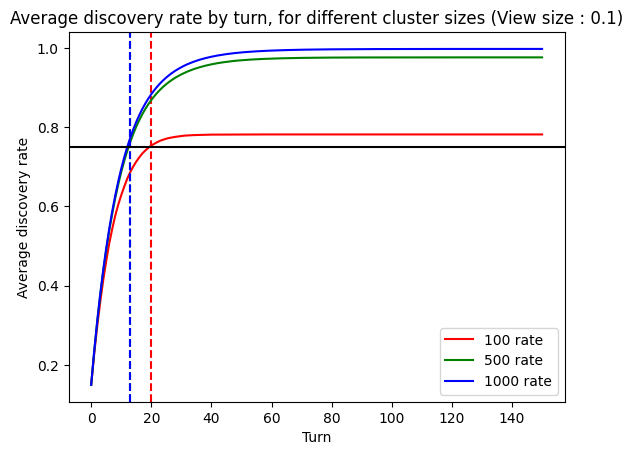

1
0
25
1
17
2
17


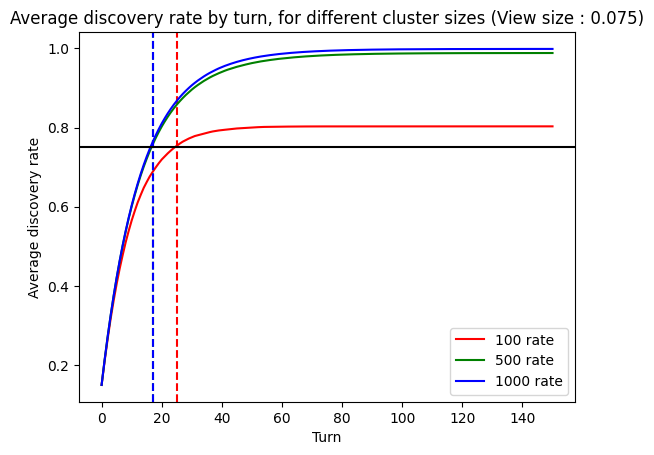

1
0
38
1
26
2
25


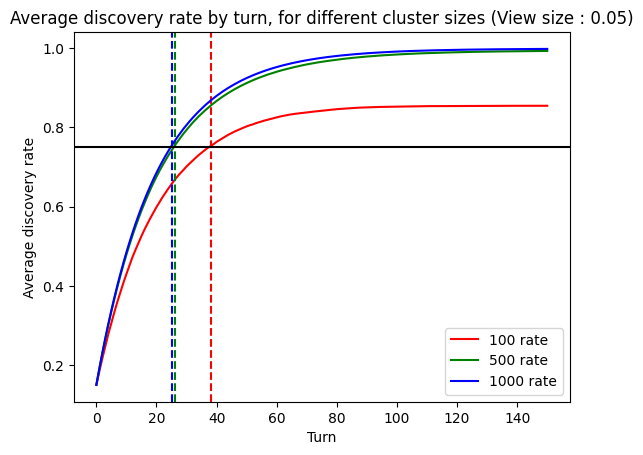

In [38]:
from matplotlib.text import Text

import bisect 
def find_ge(rates, th):
    i = bisect.bisect_left(rates, th)
    return i

for size_view in [0.1,0.075,0.05]:    
    th = 0.75

    turns = [_ for _ in range(n_turns+1)]
    discovery_rates = [res[n_nodes][size_view][0] for n_nodes in [100, 500,1000]]
    print(1)
    
    # print(turn_th)
    turn_ths = []
    repre_ths = []
    colors_xticks = []
    for i, (n_node, color) in enumerate([(100,'r'), (500,'g'), (1000, 'b')]):
        print(i)
        turn_th = find_ge(discovery_rates[i], th)
        plt.plot(turns, discovery_rates[i], color, label=str(n_node)+' rate')
        if turn_th<n_turns+1:
            print(turn_th)
            plt.axvline(x=turn_th, color=color, linestyle='--')  
            
    

    plt.axhline(y=th, color='black', linestyle='-')  

    # Adding the title
    plt.title(f"Average discovery rate by turn, for different cluster sizes (View size : {size_view})")
    plt.legend()
    # Adding the labels
    plt.ylabel("Average discovery rate")
    plt.xlabel("Turn")
    plt.show()

plot it, resiliency against **exiting nodes**

0
0
101


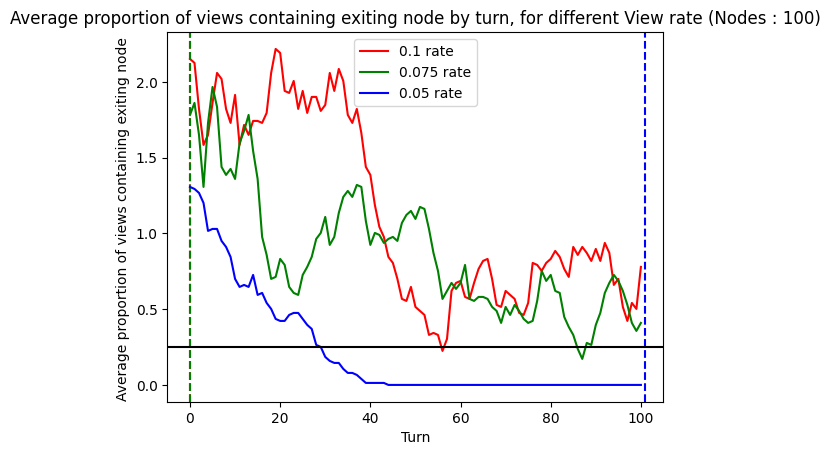

0
0
0


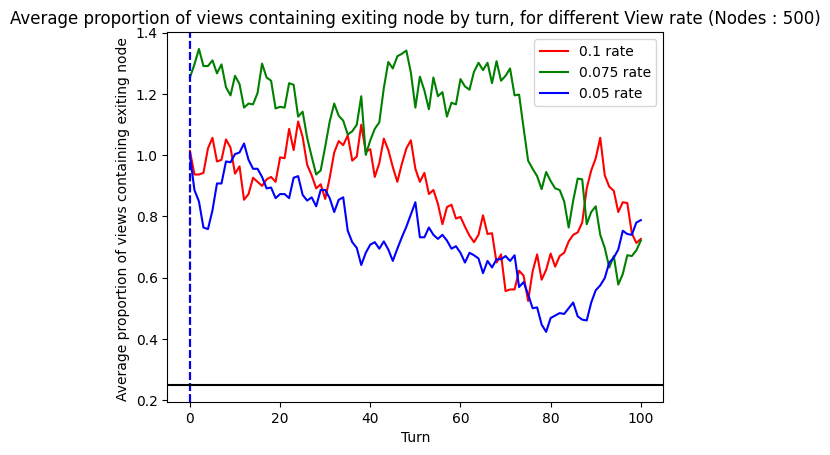

0
0
0


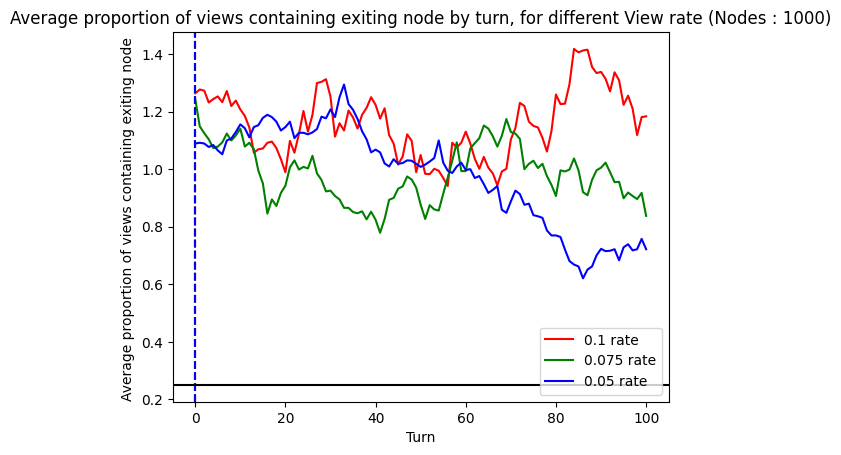

In [39]:
from matplotlib.text import Text

import bisect 
def find_ge(rates, th):
    i = bisect.bisect_left(rates, th)
    return i

for n_nodes in [100, 500,1000]:    
    th = 0.25

    turns = [_ for _ in range(101)]
    discovery_rates = [res[n_nodes][size_view][1][:101] for size_view in [0.1,0.075,0.05]]

    
    # print(turn_th)
    turn_ths = []
    repre_ths = []
    colors_xticks = []
    for i, (n_node, color) in enumerate([(0.1,'r'), (0.075,'g'), (0.05, 'b')]):
        turn_th = find_ge(discovery_rates[i], th)
        plt.plot(turns, discovery_rates[i], color, label=str(n_node)+' rate')
        if turn_th<n_turns+1:
            print(turn_th)
            plt.axvline(x=turn_th, color=color, linestyle='--')  
            
    

    plt.axhline(y=th, color='black', linestyle='-')  

    # Adding the title
    plt.title(f"Average proportion of views containing exiting node by turn, for different View rate (Nodes : {n_nodes})")
    plt.legend()
    # Adding the labels
    plt.ylabel("Average proportion of views containing exiting node ")
    plt.xlabel("Turn")
    plt.show()

0
0
0


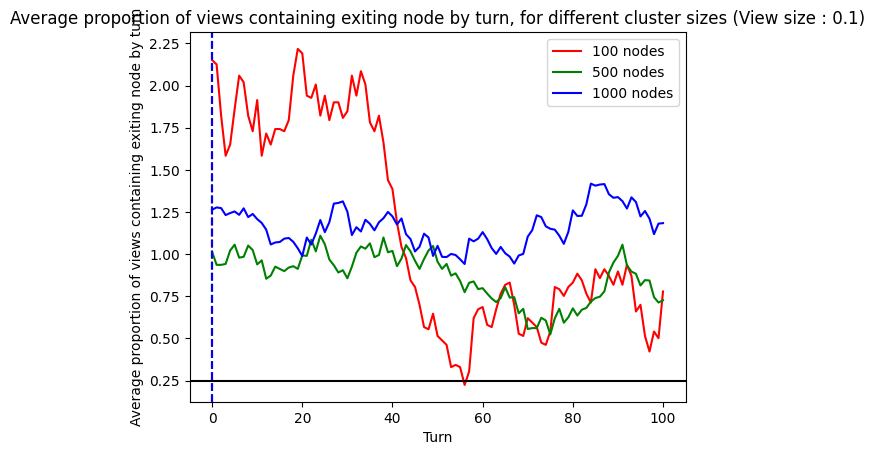

0
0
0


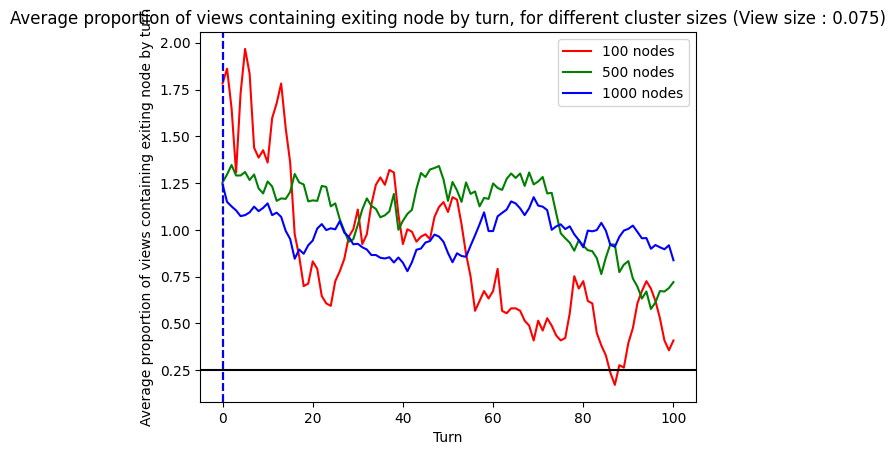

101
0
0


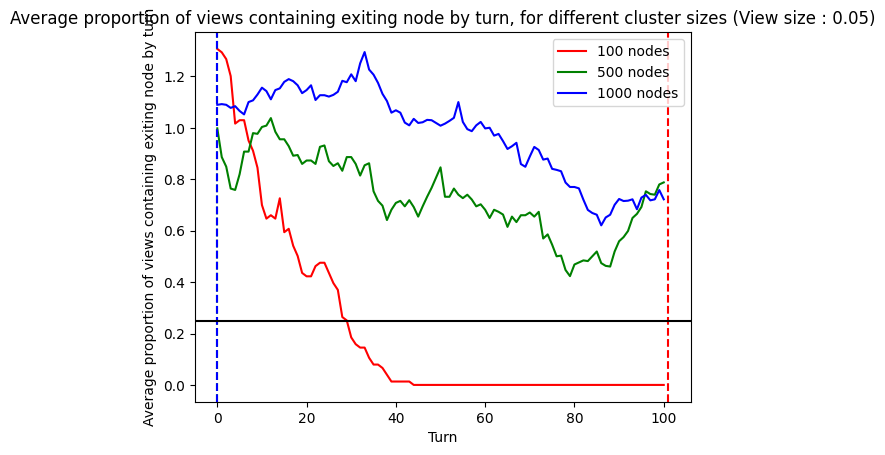

In [40]:
from matplotlib.text import Text

import bisect 
def find_ge(rates, th):
    i = bisect.bisect_left(rates, th)
    return i

for size_view in [0.1,0.075,0.05]:    
    th = 0.25

    turns = [_ for _ in range(101)]
    occ_rates = [res[n_nodes][size_view][1][:101] for n_nodes in [100, 500,1000]]

    
    # print(turn_th)
    turn_ths = []
    repre_ths = []
    colors_xticks = []
    for i, (n_node, color) in enumerate([(100,'r'), (500,'g'), (1000, 'b')]):
        turn_th = find_ge(occ_rates[i], th)
        plt.plot(turns, occ_rates[i], color, label=str(n_node)+' nodes')
        if turn_th<n_turns+1:
            print(turn_th)
            plt.axvline(x=turn_th, color=color, linestyle='--')  
            
    

    plt.axhline(y=th, color='black', linestyle='-')  

    # Adding the title
    plt.title(f"Average proportion of views containing exiting node by turn, for different cluster sizes (View size : {size_view})")
    plt.legend()
    # Adding the labels
    plt.ylabel("Average proportion of views containing exiting node by turn")
    plt.xlabel("Turn")
    plt.show()